<a href="https://colab.research.google.com/github/SnehalMalhotra/PROJECT-1/blob/master/notebook3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GOOGLE DRIVE LINK

In [1]:
drive_link="https://drive.google.com/drive/folders/1gOaPq00o-eUMkJyEE065Plq7CZORiFXb?usp=sharing"
drive_link

'https://drive.google.com/drive/folders/1gOaPq00o-eUMkJyEE065Plq7CZORiFXb?usp=sharing'

MOUNTING GOOGLE DRIVE

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


IMPORTING REQUIRED LIBRARIES

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning, append=True)

INSTALLING KAGGLE

In [4]:
!pip install kaggle

UPLOADING KAGGLE.JSON FILE

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"snehalmalhotra","key":"2162662b2f4925f79c18aa6b2e318aef"}'}

SETTING UP ENVIRONMENT VARIABLES

In [6]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

DOWNLOADING DATASET

In [7]:
!kaggle datasets download -d snehalmalhotra/project-1-food

 99% 1.70G/1.71G [00:21<00:00, 92.3MB/s]
100% 1.71G/1.71G [00:21<00:00, 86.6MB/s]


UNZIPPING ALL FILES

In [8]:
!unzip "*.zip"

Streaming output truncated to the last 5000 lines.
  inflating: images/seaweed_salad/1344888.jpg  
  inflating: images/seaweed_salad/1353044.jpg  
  inflating: images/seaweed_salad/1356723.jpg  
  inflating: images/seaweed_salad/135986.jpg  
  inflating: images/seaweed_salad/1362289.jpg  
  inflating: images/seaweed_salad/1368944.jpg  
  inflating: images/seaweed_salad/1373406.jpg  
  inflating: images/seaweed_salad/1374245.jpg  
  inflating: images/seaweed_salad/1375859.jpg  
  inflating: images/seaweed_salad/1377242.jpg  
  inflating: images/seaweed_salad/1377412.jpg  
  inflating: images/seaweed_salad/1377676.jpg  
  inflating: images/seaweed_salad/1380296.jpg  
  inflating: images/seaweed_salad/1384500.jpg  
  inflating: images/seaweed_salad/1387272.jpg  
  inflating: images/seaweed_salad/1388596.jpg  
  inflating: images/seaweed_salad/1397174.jpg  
  inflating: images/seaweed_salad/1402866.jpg  
  inflating: images/seaweed_salad/1403794.jpg  
  inflating: images/seaweed_salad/1407

In [9]:
predictor = load_learner("/content/drive/My Drive/GeeksMan_AISquad_Project1_SNEHAL")

Making prediction function which accepts a test_image address as input and will return results.

In [10]:
def my_predictor(im):
  test_img =open_image(im)
  pred_class,pred_idx,outputs=predictor.predict(test_img)
  return pred_class

Saving all test_images in a list

In [11]:
all_test_images=os.listdir("test_data")
all_test_images

['1899785.jpg',
 '2304139.jpg',
 '1974609.jpg',
 '2182393.jpg',
 '754100.jpg',
 '660344.jpg',
 '2685394.jpg',
 '3558408.jpg',
 '1757216.jpg',
 '1283979.jpg',
 '2060571.jpg',
 '1008604.jpg',
 '1047561.jpg',
 '559350.jpg',
 '2854794.jpg',
 '3760569.jpg',
 '783083.jpg',
 '124624.jpg',
 '44179.jpg',
 '1844235.jpg',
 '3310788.jpg',
 '2249708.jpg',
 '732104.jpg',
 '980125.jpg',
 '3541954.jpg',
 '1387719.jpg',
 '3220982.jpg',
 '2962962.jpg',
 '3904520.jpg',
 '2938497.jpg',
 '881734.jpg',
 '273422.jpg',
 '696778.jpg',
 '3855204.jpg',
 '3794194.jpg',
 '2858030.jpg',
 '464467.jpg',
 '3557699.jpg',
 '2301273.jpg',
 '537375.jpg',
 '1424416.jpg',
 '167047.jpg',
 '355367.jpg',
 '3842575.jpg',
 '3401362.jpg',
 '400071.jpg',
 '489570.jpg',
 '598381.jpg',
 '553466.jpg',
 '3330111.jpg',
 '1931101.jpg',
 '948362.jpg',
 '1395119.jpg',
 '1029932.jpg',
 '2922262.jpg',
 '614981.jpg',
 '9160.jpg',
 '185513.jpg',
 '2101820.jpg',
 '2009628.jpg',
 '2913386.jpg',
 '243708.jpg',
 '1092036.jpg',
 '2217304.jpg',
 '1

Predicting for a single image

falafel


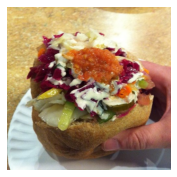

In [12]:
idx=1156
print(my_predictor("test_data/"+all_test_images[idx]))
img = open_image("test_data/"+all_test_images[idx])
img.show()

IMPORTING cv2 LIBRARY FOR GENERATING VIDEO

In [13]:
import cv2
test_files=os.listdir("test_data")
os.makedirs("test_result",exist_ok=True)
i=0
for test_file in test_files:
  img=cv2.imread("test_data/"+test_file)
  cv2.imwrite("temp.jpg",img)
  ans_text=my_predictor("temp.jpg")
  font = cv2.FONT_HERSHEY_TRIPLEX
  i+=1
  org = (0, 50) 
  fontScale = 2
  color = (255, 0, 0) 
  thickness = 4
  img = cv2.putText(img, str(ans_text), org, font,fontScale, color, thickness, cv2.LINE_AA) 
  cv2.imwrite("test_result/"+str(i)+".jpg", img)

In [14]:
%cd "test_result"
!ffmpeg -framerate 1 -pattern_type glob -i '*.jpg' \-c:v libx264 -r 1 -pix_fmt yuv420p ../my_final_output.mp4
%cd ..

/content/test_result
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable

INSTALLING KORA

In [15]:
!pip install -U kora
from kora.drive import upload_public

CREATING A URL VARIABLE THAT CONTAINS LINK OF OUR VIDEO

In [16]:
url = upload_public('my_final_output.mp4')

DISPLAYING VIDEO

In [17]:
from IPython.display import HTML
HTML(f"""<video src={url} width=500 controls/>""")

In [18]:
url

'https://drive.google.com/uc?id=1_3LSidKSp2ReSwC8WcSyfCcOUTklgvww'